# FAKE PRODUCT REVIEW, ANALYSIS AND MONITORING:

## MODULE 1: Data Cleaning
Data Cleaning: Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.
## MODULE 2: Exploratory Data Analysis
Exploratory Data Analysis: EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:
– main features of data
– variables and relationships that hold between them
– identifying which variables are important for our problem
## MODULE 3: Corpus
This module has three major functions which leads to the creation of the corpus and they are as follows.
### Tokenization:
It is done in order to view the possibilities of all the meaningful words the data is broken down into the words and phrases.
### Stop-Word Elimination:
Negative stop-words are identified with the help of text mining and are removed. This helps in speeding up the time when training and testing the model.
### Stemming: 
All the words present in the input string will be reduced to its root form by removing any unwanted prefix or suffix in order to make the process more efficient.
## MODULE 4: Feature Engineering
Feature engineering is the extraction of data and converting them in a format where the machine learning model can understand.In Layman terms, it is the conversion of all the string values into numbers.
### Bag of Words Model
Its is used to count the number of induvidual words as well as their frequency, this is done to process NLP by storing these values in a Pandas Dataframe.
### Dummy Variables
Dummy variables are used to convert categorical data into a Numerical Dataframe.This dataframe is then added to the Bag of Words Model Dataframe to form the Final Dataset.
## MODULE 5: Random Forest Classifier
Random Forest Classifier: random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
import numpy as np
import nltk
import string
import bs4 as bs
import re
import pandas as pd
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer,LancasterStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,classification_report
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [ ]:
df=pd.read_excel("amazon_reviews.xlsx")
df.head()

,DOC_ID,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,PRODUCT_TITLE,REVIEW_TITLE,REVIEW_TEXT
0,1,Fake,4,N,PC,B00008NG7N,"Targus PAUK10U Ultra Mini USB Keypad, Black",useful,"When least you think so, this product will sav..."
1,2,Fake,4,Y,Wireless,B00LH0Y3NM,Note 3 Battery : Stalion Strength Replacement ...,New era for batteries,Lithium batteries are something new introduced...
2,3,Fake,3,N,Baby,B000I5UZ1Q,"Fisher-Price Papasan Cradle Swing, Starlight",doesn't swing very well.,I purchased this swing for my baby. She is 6 m...
3,4,Fake,4,N,Office Products,B003822IRA,Casio MS-80B Standard Function Desktop Calculator,Great computing!,I was looking for an inexpensive desk calcolat...
4,5,Fake,4,N,Beauty,B00PWSAXAM,Shine Whitening - Zero Peroxide Teeth Whitenin...,Only use twice a week,I only use it twice a week and the results are...


# Module 1: Data Cleaning:

Data Cleaning: Data cleansing or data cleaning is the process of detecting and correcting (or removing) corrupt or inaccurate records from a record set, table, or database and refers to identifying incomplete, incorrect, inaccurate or irrelevant parts of the data and then replacing, modifying, or deleting the dirty or coarse data.

### Columns not used are removed:     
1) Doc_ID      
2) Product_Title          
3) Review_ Title

In [ ]:
del df['DOC_ID']
del df['PRODUCT_TITLE']
del df['REVIEW_TITLE']

In [ ]:
df.head()

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,REVIEW_TEXT
0,Fake,4,N,PC,B00008NG7N,"When least you think so, this product will sav..."
1,Fake,4,Y,Wireless,B00LH0Y3NM,Lithium batteries are something new introduced...
2,Fake,3,N,Baby,B000I5UZ1Q,I purchased this swing for my baby. She is 6 m...
3,Fake,4,N,Office Products,B003822IRA,I was looking for an inexpensive desk calcolat...
4,Fake,4,N,Beauty,B00PWSAXAM,I only use it twice a week and the results are...


The Rows which have any null values are completely removed. Although this is a clean data set without any null values, any real-world data set will have many null values. They will have to be removed.

### Heatmap to check for Null Values:

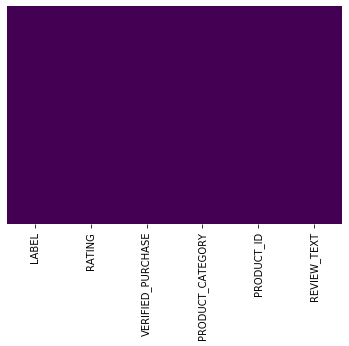

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### Removing columns with Null Values:

In [ ]:
df.dropna()
df

,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_CATEGORY,PRODUCT_ID,REVIEW_TEXT
0,Fake,4,N,PC,B00008NG7N,"When least you think so, this product will sav..."
1,Fake,4,Y,Wireless,B00LH0Y3NM,Lithium batteries are something new introduced...
2,Fake,3,N,Baby,B000I5UZ1Q,I purchased this swing for my baby. She is 6 m...
3,Fake,4,N,Office Products,B003822IRA,I was looking for an inexpensive desk calcolat...
4,Fake,4,N,Beauty,B00PWSAXAM,I only use it twice a week and the results are...
...,...,...,...,...,...,...
20995,Real,4,Y,Shoes,B00BXYM8T8,"I bought these for work. I have high arches, ..."
20996,Real,4,Y,Shoes,B0014C2ORK,Crocs are one of only two brands of shoes that...
20997,Real,5,Y,Shoes,B000EX8CCQ,I love moccasins This fit like it was custom ...
20998,Real,5,Y,Shoes,B00748YHVE,I wish these were a little more durable. I got...


No rows removed.

# Module 2: Exploratory Data Analysis:

Exploratory Data Analysis:        
EDA is a phenomenon under data analysis used for gaining a better understanding of data aspects like:      
– main features of data.      
– variables and relationships that hold between them.        
– identifying which variables are important for our problem.

### Plot: Count for Verified Purchase

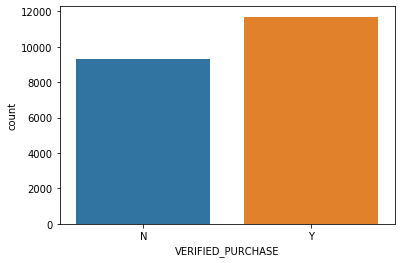

In [ ]:
sns.countplot(df['VERIFIED_PURCHASE'])

### Plot: Count for Real and Fake Data

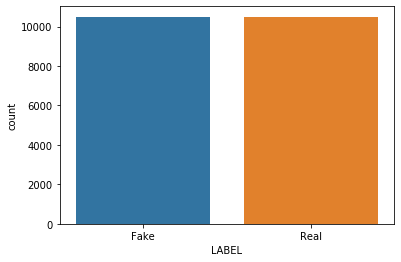

In [ ]:
sns.countplot(df['LABEL'])

Our dataset contains equal number of real and fake data to train and test. 

### Plot: Ratings Against Count 

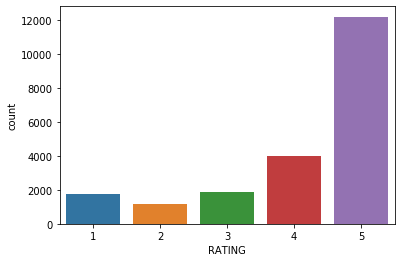

In [ ]:
sns.countplot(df['RATING'])

### Plot: Product Category and Verified_Purchase Against Ratings

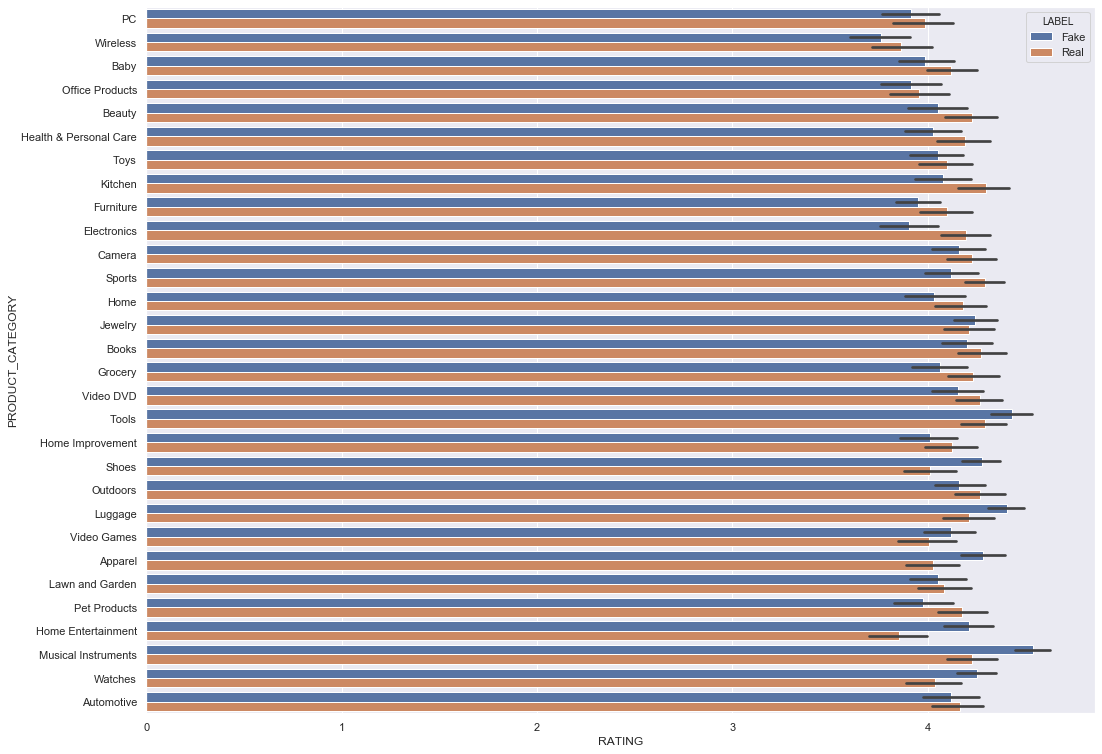

In [ ]:
sns.set(rc={'figure.figsize':(17,13)})
sns.barplot(x='RATING',y='PRODUCT_CATEGORY',data=df,hue='LABEL')

### Plot: Product_Category and Verified Purchase Against Count

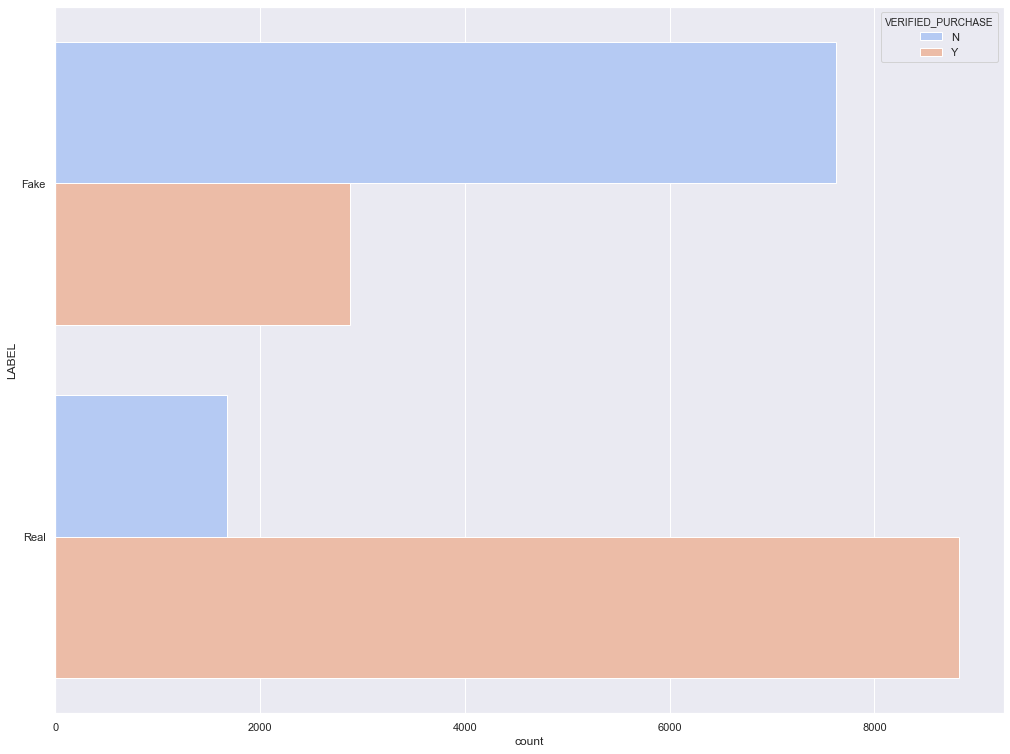

In [ ]:
sns.countplot(y='LABEL',data=df,palette='coolwarm',hue='VERIFIED_PURCHASE')

We can notice a general trend here. The purchases made that are not verified are mostly fake and this number reduces drastically for the real reviews. And Verified purchases are often real reviews. This ratio is polarising to the extent of being 1:5 of fake to real in case of making a verified purchase. 

# Category Selection

In [ ]:
cats=list(df['PRODUCT_CATEGORY'].unique())
cats

['PC',
 'Wireless',
 'Baby',
 'Office Products',
 'Beauty',
 'Health & Personal Care',
 'Toys',
 'Kitchen',
 'Furniture',
 'Electronics',
 'Camera',
 'Sports',
 'Home',
 'Jewelry',
 'Books',
 'Grocery',
 'Video DVD',
 'Tools',
 'Home Improvement',
 'Shoes',
 'Outdoors',
 'Luggage',
 'Video Games',
 'Apparel',
 'Lawn and Garden',
 'Pet Products',
 'Home Entertainment',
 'Musical Instruments',
 'Watches',
 'Automotive']

In [ ]:
a=widgets.Combobox(
    value='Shoes',
    placeholder='Choose a category',
    options=cats,
    description='Combobox:',
    ensure_option=True,
    disabled=False
)
display(a)

Combobox(value='Shoes', description='Combobox:', ensure_option=True, options=('PC', 'Wireless', 'Baby', 'Offic…

In [ ]:
k=a.value
k

'Shoes'

In [ ]:
test = pd.DataFrame(df[df["PRODUCT_CATEGORY"]==k].drop('PRODUCT_CATEGORY',axis=1))
test.columns = ["LABEL","RATING","VERIFIED_PURCHASE","PRODUCT_ID","REVIEW_TEXT"]
test.reset_index(inplace=True)
test

,index,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_ID,REVIEW_TEXT
0,88,Fake,4,Y,B004LBJNI4,"These are odd slippers, they fit great for a d..."
1,126,Fake,4,N,B00FEW5XZ6,The color of the bag is absolutely amazing! Th...
2,139,Fake,4,Y,B00HK9EJDS,This is so cute! I have to buy this since my e...
3,636,Fake,3,N,B005GJ4HH2,I receive so many compliments on these glasses...
4,707,Fake,4,N,B000KJ4FOI,My hubby has had his pair of reef sandals for ...
...,...,...,...,...,...,...
695,20995,Real,4,Y,B00BXYM8T8,"I bought these for work. I have high arches, ..."
696,20996,Real,4,Y,B0014C2ORK,Crocs are one of only two brands of shoes that...
697,20997,Real,5,Y,B000EX8CCQ,I love moccasins This fit like it was custom ...
698,20998,Real,5,Y,B00748YHVE,I wish these were a little more durable. I got...


# Module 3: Corpus

In [ ]:
stops = set(stopwords.words("english"))
porter = PorterStemmer()
lancaster=LancasterStemmer()

In [ ]:
def stemSentence(sentence):
    sentence = [char for char in sentence if char not in string.punctuation]
    sentence = ''.join(sentence)
    sentence=[word for word in sentence.split() if word.lower() not in stops]
    sentence=' '.join(sentence)
    return sentence
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
stemSentence('ran run running!!')

'ran run running'

In [ ]:
stemSentence('study studied i was studying')

'study studied studying'

In [ ]:
test['CORPUS']=test['REVIEW_TEXT'].apply(stemSentence)

In [ ]:
test

,index,LABEL,RATING,VERIFIED_PURCHASE,PRODUCT_ID,REVIEW_TEXT,CORPUS
0,88,Fake,4,Y,B004LBJNI4,"These are odd slippers, they fit great for a d...",odd slippers fit great day felt large either s...
1,126,Fake,4,N,B00FEW5XZ6,The color of the bag is absolutely amazing! Th...,color bag absolutely amazing inside baglining ...
2,139,Fake,4,Y,B00HK9EJDS,This is so cute! I have to buy this since my e...,cute buy since earphones always getting tied I...
3,636,Fake,3,N,B005GJ4HH2,I receive so many compliments on these glasses...,receive many compliments glasses small face lo...
4,707,Fake,4,N,B000KJ4FOI,My hubby has had his pair of reef sandals for ...,hubby pair reef sandals years extremely durabl...
...,...,...,...,...,...,...,...
695,20995,Real,4,Y,B00BXYM8T8,"I bought these for work. I have high arches, ...",bought work high arches use arch support heels...
696,20996,Real,4,Y,B0014C2ORK,Crocs are one of only two brands of shoes that...,Crocs one two brands shoes feet day work Love ...
697,20997,Real,5,Y,B000EX8CCQ,I love moccasins This fit like it was custom ...,love moccasins fit like custom made mebr soft ...
698,20998,Real,5,Y,B00748YHVE,I wish these were a little more durable. I got...,wish little durable got caught bolt crossing b...


# Module 4: Feature Engineering

In [ ]:
corpus = test['CORPUS']
corpus

0      odd slippers fit great day felt large either s...
1      color bag absolutely amazing inside baglining ...
2      cute buy since earphones always getting tied I...
3      receive many compliments glasses small face lo...
4      hubby pair reef sandals years extremely durabl...
                             ...                        
695    bought work high arches use arch support heels...
696    Crocs one two brands shoes feet day work Love ...
697    love moccasins fit like custom made mebr soft ...
698    wish little durable got caught bolt crossing b...
699    Ive looking replacement beloved KSO treks owne...
Name: CORPUS, Length: 700, dtype: object

In [ ]:
vectorizer=CountVectorizer()

In [ ]:
bow=vectorizer.fit_transform(corpus)
print(bow.toarray())
print(vectorizer.get_feature_names())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['10', '100', '1000', '100200', '1012', '105', '10s', '11', '110', '1134', '115', '115s', '11s', '12', '12w', '13', '13th', '14', '15', '16', '17', '180', '1850', '20', '200', '2005', '2014', '23', '247', '25', '2e', '2nd', '30', '3334', '34', '34air', '34classy34', '34creating', '34dress', '34extra', '34fits', '34heavier34', '34i', '34kit34', '34large34', '34look34', '34m34', '34made', '34may', '34nice', '34normal34', '34oh', '34overperscription34', '34oversized34', '34pricey34', '34purses34', '34regular34', '34slides34br', '34they', '34we', '34where', '34why', '34wide', '38', '3899', '38wide', '39', '395', '3br', '3e', '3rd', '3s', '3star', '40', '445', '45', '47', '4wd', '50', '500', '5050', '510', '511', '512', '59', '5br', '5hole', '5pm', '5star', '5th', '60', '65', '6900', '734', '75', '758', '75ft', '78', '7us40eur', '80', '80s', '810', '83', '85', '850', '856'

In [ ]:
bow1=pd.DataFrame(bow.toarray(),columns=vectorizer.get_feature_names())
bow1

,10,100,1000,100200,1012,105,10s,11,110,1134,...,youthe,yr,zebra,zen,zero,zipper,zippered,ébr,款式好看,这双鞋尺码非常合适
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
VP=pd.get_dummies(test['VERIFIED_PURCHASE'])
VP

,N,Y
0,0,1
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
695,0,1
696,0,1
697,0,1
698,0,1


In [ ]:
bow1["VERIFIED_PURCHASE"]=VP["Y"]
bow1['Fake']=test['LABEL']

In [ ]:
bow1

,10,100,1000,100200,1012,105,10s,11,110,1134,...,zebra,zen,zero,zipper,zippered,ébr,款式好看,这双鞋尺码非常合适,VERIFIED_PURCHASE,Fake
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Fake
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Fake
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Real
696,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Real
697,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Real
698,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Real


# Module 5: Random Forest Classifier:
Random Forest Classifier: A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

In [ ]:
X=bow1.drop('Fake',axis=1)
y=bow1['Fake']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

In [ ]:
rd=RandomForestClassifier(n_estimators=200)

In [ ]:
rd.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
predpipe=rd.predict(X_test)

In [ ]:
print(confusion_matrix(y_test,predpipe))
print('\n')
print(classification_report(y_test,predpipe))

[[102  14]
 [  7  87]]


              precision    recall  f1-score   support

        Fake       0.94      0.88      0.91       116
        Real       0.86      0.93      0.89        94

    accuracy                           0.90       210
   macro avg       0.90      0.90      0.90       210
weighted avg       0.90      0.90      0.90       210



In [ ]:
X_test

,10,100,1000,100200,1012,105,10s,11,110,1134,...,yr,zebra,zen,zero,zipper,zippered,ébr,款式好看,这双鞋尺码非常合适,VERIFIED_PURCHASE
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
321,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
74,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
346,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
372,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
683,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
predpipe=rd.predict(X_test.iloc[[0]])
predpipe

array(['Real'], dtype=object)